In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import preprocessing


In [8]:
df = pd.read_csv('../Project_4/data/fma_30secs.csv')
df.head()

,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,000574.mp3,0.441314,0.075278,0.275232,0.001600,2609.785750,256236.018231,2521.969715,125093.515221,5466.147737,...,26.742771,-8.637082,26.087423,-0.386710,23.891684,-6.258696,24.871336,1.375780,26.662823,Rock
1,000534.mp3,0.292695,0.091941,0.087868,0.002763,1010.298595,179766.701341,1592.119431,78190.000091,1792.776766,...,47.370823,-1.805183,39.497108,-3.202246,34.362484,-3.180355,52.614132,0.088798,41.659271,Folk
2,000255.mp3,0.388428,0.084395,0.143468,0.001984,1255.780763,177158.984513,1521.012866,170832.492310,2337.811993,...,48.551289,-7.853301,40.808487,-2.617470,44.769215,-8.972784,38.892246,-2.864987,32.844204,Rock
3,000995.mp3,0.696506,0.031770,0.407609,0.000273,2782.504453,20714.043440,2450.897293,1656.762565,5539.045960,...,9.571607,-6.599209,9.725904,-0.365892,9.875140,-6.286016,9.309373,-0.737182,9.382082,Experimental
4,000777.mp3,0.418597,0.091328,0.107960,0.006224,2418.853058,570824.791781,2546.666042,173932.978317,5279.554442,...,56.395607,-3.559430,36.739960,2.450911,47.888744,-0.800907,52.027950,-1.560855,36.650490,Rock


In [9]:
# remove null values
df.dropna()

,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,000574.mp3,0.441314,0.075278,0.275232,0.001600,2609.785750,2.562360e+05,2521.969715,1.250935e+05,5466.147737,...,26.742771,-8.637082,26.087423,-0.386710,23.891684,-6.258696,24.871336,1.375780,26.662823,Rock
1,000534.mp3,0.292695,0.091941,0.087868,0.002763,1010.298595,1.797667e+05,1592.119431,7.819000e+04,1792.776766,...,47.370823,-1.805183,39.497108,-3.202246,34.362484,-3.180355,52.614132,0.088798,41.659271,Folk
2,000255.mp3,0.388428,0.084395,0.143468,0.001984,1255.780763,1.771590e+05,1521.012866,1.708325e+05,2337.811993,...,48.551289,-7.853301,40.808487,-2.617470,44.769215,-8.972784,38.892246,-2.864987,32.844204,Rock
3,000995.mp3,0.696506,0.031770,0.407609,0.000273,2782.504453,2.071404e+04,2450.897293,1.656763e+03,5539.045960,...,9.571607,-6.599209,9.725904,-0.365892,9.875140,-6.286016,9.309373,-0.737182,9.382082,Experimental
4,000777.mp3,0.418597,0.091328,0.107960,0.006224,2418.853058,5.708248e+05,2546.666042,1.739330e+05,5279.554442,...,56.395607,-3.559430,36.739960,2.450911,47.888744,-0.800907,52.027950,-1.560855,36.650490,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989,154308.mp3,0.371508,0.092021,0.068340,0.003786,1684.102130,5.766519e+05,1934.831072,3.531104e+05,3267.876238,...,90.529327,4.203887,88.260361,2.578168,108.627663,1.229802,69.146027,-3.231378,65.685440,Hip-Hop
7990,154414.mp3,0.303817,0.090807,0.127625,0.001136,2175.384457,8.446032e+05,2419.410997,2.256038e+05,4629.371800,...,45.318336,-7.242350,54.071156,-1.181491,68.359894,-7.297359,76.318565,-0.967362,86.636475,Pop
7991,154309.mp3,0.309708,0.109356,0.072136,0.004511,2581.043465,3.142707e+06,2196.357558,1.042966e+06,4931.462124,...,40.587910,-10.535615,65.553123,1.829005,104.420601,7.517188,172.519028,8.653241,166.640015,Hip-Hop
7992,154305.mp3,0.486067,0.086112,0.062706,0.001368,1048.557575,1.339963e+06,1246.649948,1.053758e+06,2268.921805,...,136.156326,14.001201,120.159660,15.255370,127.454300,9.642860,202.344238,4.686521,170.412628,Hip-Hop


In [10]:
df.drop('filename', axis =1)

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.441314,0.075278,0.275232,0.001600,2609.785750,2.562360e+05,2521.969715,1.250935e+05,5466.147737,1.788059e+06,...,26.742771,-8.637082,26.087423,-0.386710,23.891684,-6.258696,24.871336,1.375780,26.662823,Rock
1,0.292695,0.091941,0.087868,0.002763,1010.298595,1.797667e+05,1592.119431,7.819000e+04,1792.776766,1.334504e+06,...,47.370823,-1.805183,39.497108,-3.202246,34.362484,-3.180355,52.614132,0.088798,41.659271,Folk
2,0.388428,0.084395,0.143468,0.001984,1255.780763,1.771590e+05,1521.012866,1.708325e+05,2337.811993,1.217803e+06,...,48.551289,-7.853301,40.808487,-2.617470,44.769215,-8.972784,38.892246,-2.864987,32.844204,Rock
3,0.696506,0.031770,0.407609,0.000273,2782.504453,2.071404e+04,2450.897293,1.656763e+03,5539.045960,4.809832e+04,...,9.571607,-6.599209,9.725904,-0.365892,9.875140,-6.286016,9.309373,-0.737182,9.382082,Experimental
4,0.418597,0.091328,0.107960,0.006224,2418.853058,5.708248e+05,2546.666042,1.739330e+05,5279.554442,2.005530e+06,...,56.395607,-3.559430,36.739960,2.450911,47.888744,-0.800907,52.027950,-1.560855,36.650490,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989,0.371508,0.092021,0.068340,0.003786,1684.102130,5.766519e+05,1934.831072,3.531104e+05,3267.876238,2.954870e+06,...,90.529327,4.203887,88.260361,2.578168,108.627663,1.229802,69.146027,-3.231378,65.685440,Hip-Hop
7990,0.303817,0.090807,0.127625,0.001136,2175.384457,8.446032e+05,2419.410997,2.256038e+05,4629.371800,3.583311e+06,...,45.318336,-7.242350,54.071156,-1.181491,68.359894,-7.297359,76.318565,-0.967362,86.636475,Pop
7991,0.309708,0.109356,0.072136,0.004511,2581.043465,3.142707e+06,2196.357558,1.042966e+06,4931.462124,9.546548e+06,...,40.587910,-10.535615,65.553123,1.829005,104.420601,7.517188,172.519028,8.653241,166.640015,Hip-Hop
7992,0.486067,0.086112,0.062706,0.001368,1048.557575,1.339963e+06,1246.649948,1.053758e+06,2268.921805,6.032222e+06,...,136.156326,14.001201,120.159660,15.255370,127.454300,9.642860,202.344238,4.686521,170.412628,Hip-Hop


In [11]:
le = preprocessing.LabelEncoder()
X = df.drop(['label','filename'], axis = 1)
y = le.fit_transform(df.label.values)
X

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.441314,0.075278,0.275232,0.001600,2609.785750,2.562360e+05,2521.969715,1.250935e+05,5466.147737,1.788059e+06,...,-3.649815,26.742771,-8.637082,26.087423,-0.386710,23.891684,-6.258696,24.871336,1.375780,26.662823
1,0.292695,0.091941,0.087868,0.002763,1010.298595,1.797667e+05,1592.119431,7.819000e+04,1792.776766,1.334504e+06,...,0.693530,47.370823,-1.805183,39.497108,-3.202246,34.362484,-3.180355,52.614132,0.088798,41.659271
2,0.388428,0.084395,0.143468,0.001984,1255.780763,1.771590e+05,1521.012866,1.708325e+05,2337.811993,1.217803e+06,...,-1.048262,48.551289,-7.853301,40.808487,-2.617470,44.769215,-8.972784,38.892246,-2.864987,32.844204
3,0.696506,0.031770,0.407609,0.000273,2782.504453,2.071404e+04,2450.897293,1.656763e+03,5539.045960,4.809832e+04,...,0.098520,9.571607,-6.599209,9.725904,-0.365892,9.875140,-6.286016,9.309373,-0.737182,9.382082
4,0.418597,0.091328,0.107960,0.006224,2418.853058,5.708248e+05,2546.666042,1.739330e+05,5279.554442,2.005530e+06,...,4.055317,56.395607,-3.559430,36.739960,2.450911,47.888744,-0.800907,52.027950,-1.560855,36.650490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989,0.371508,0.092021,0.068340,0.003786,1684.102130,5.766519e+05,1934.831072,3.531104e+05,3267.876238,2.954870e+06,...,3.838456,90.529327,4.203887,88.260361,2.578168,108.627663,1.229802,69.146027,-3.231378,65.685440
7990,0.303817,0.090807,0.127625,0.001136,2175.384457,8.446032e+05,2419.410997,2.256038e+05,4629.371800,3.583311e+06,...,-3.166735,45.318336,-7.242350,54.071156,-1.181491,68.359894,-7.297359,76.318565,-0.967362,86.636475
7991,0.309708,0.109356,0.072136,0.004511,2581.043465,3.142707e+06,2196.357558,1.042966e+06,4931.462124,9.546548e+06,...,-7.701744,40.587910,-10.535615,65.553123,1.829005,104.420601,7.517188,172.519028,8.653241,166.640015
7992,0.486067,0.086112,0.062706,0.001368,1048.557575,1.339963e+06,1246.649948,1.053758e+06,2268.921805,6.032222e+06,...,11.677936,136.156326,14.001201,120.159660,15.255370,127.454300,9.642860,202.344238,4.686521,170.412628


In [12]:
#Split our data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.0510627 ,  1.29154985, -1.33276881, ..., -0.20512555,
         0.22991048, -0.22016925],
       [-0.25340786, -0.2906785 , -0.073091  , ..., -0.3045616 ,
        -1.37900881, -0.28930418],
       [ 0.93893615, -0.34146356,  0.58810899, ...,  0.16479805,
        -1.91100051, -0.50287672],
       ...,
       [ 0.2795708 ,  0.16766173, -1.03238599, ..., -0.75794979,
         0.29836808, -0.23886918],
       [ 0.59411903, -1.09751611, -0.79526929, ..., -0.35899893,
        -0.07133563, -0.62958334],
       [ 0.66322261,  0.84291705,  0.92077402, ..., -0.49542352,
         1.09474368, -0.548162  ]])

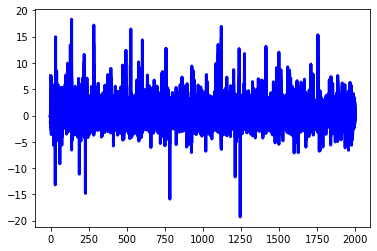

In [14]:
# Plot outputs
plt.plot(X_test_scaled, color='blue',linewidth=3)
plt.show()

In [15]:
#Initializing the model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [16]:
classifier.fit(X_train_scaled, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
#Making prediction 
prediction = classifier.predict(X_test_scaled)
prediction 

array([3, 6, 1, ..., 1, 7, 3])

In [18]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = classifier.predict(X_test_scaled)
cnf_matrix = metrics.confusion_matrix(y_true, y_pred)
cnf_matrix

array([[120,  20,  11,  40,  11,  11,  12,   9],
       [ 33,  59,  20,  13,  34,  44,  23,  20],
       [  4,   9, 165,   7,  26,  13,  25,  18],
       [ 47,   6,   2, 168,   1,  20,  10,   6],
       [ 14,  30,  26,   3, 119,  12,  10,  20],
       [ 21,  23,  38,  30,  12,  97,  26,  24],
       [ 25,  18,  25,  23,  23,  33,  46,  55],
       [  7,   6,  11,   4,  14,  11,  16, 170]], dtype=int64)

A confusion matrix is a table that is used to evaluate the performance of the classification model
Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 8*8 because this model has 8 classification(using 8 genres)

#### Visualizing Confusion Matrix using Heatmap

Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn

Text(0.5, 257.44, 'Predicted label')

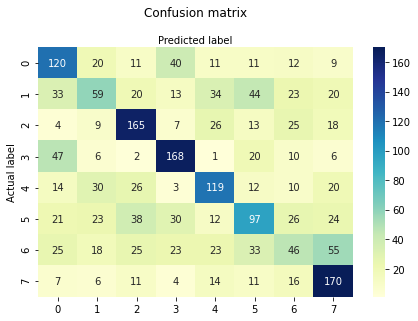

In [19]:
# Visualizing confusion matrix
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Confusion Matrix Evaluation Metrics
Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall

In [20]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Training Data Score: 0.49407839866555464
Accuracy: 0.47223611805902954


 The classification rate is 45%, which is not considered as a good accuracy so the model needs to be optimized. 

In [22]:
from joblib import dump, load
dump(classifier, 'Model/30_sec-model_lr.joblib')

['Model/30_sec-model_lr.joblib']